In [ ]:
%matplotlib inline

# Plotting Passes for Sweden vs England
Using MPL Soccer Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, VerticalPitch, Sbopen

In [10]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)
team1, team2 = df.team_name.unique()
passes = df.loc[df['type_name'] == 'Pass'].set_index('id')
print(passes)

                                      index  period        timestamp  minute  \
id                                                                             
8d5673e4-0d1b-48a1-8945-38f7ea98c548      5       1  00:00:00.140000       0   
56fa96cb-0ee2-4414-be1c-ab35887c7431      9       1  00:00:05.143000       0   
de86424c-7015-4948-b898-015377a67f07     12       1  00:00:07.844000       0   
ef4b5f7d-1989-4dba-b37e-d59b41abee14     15       1  00:00:10.586000       0   
c6fecc55-51ad-4779-b38a-51dbcd12d270     19       1  00:00:11.326000       0   
...                                     ...     ...              ...     ...   
85b5ba1d-d278-41a7-b249-1180c76b6cdd   3271       2  00:48:09.673000      93   
147e2ecc-fef1-4d1d-acdd-332139c5a98a   3274       2  00:48:11.298000      93   
7ddc4410-9545-4cf1-8b05-f8ab730bb08c   3277       2  00:48:13.680000      93   
4ade93d1-ebf3-4c4f-bec5-d587206c0ff6   3280       2  00:48:17.507000      93   
95dc3f18-7494-4b78-b7bd-c07845c55b72   3

# Plotting Start Point of Every Pass
Iteratively plotting for every pass from Sweden

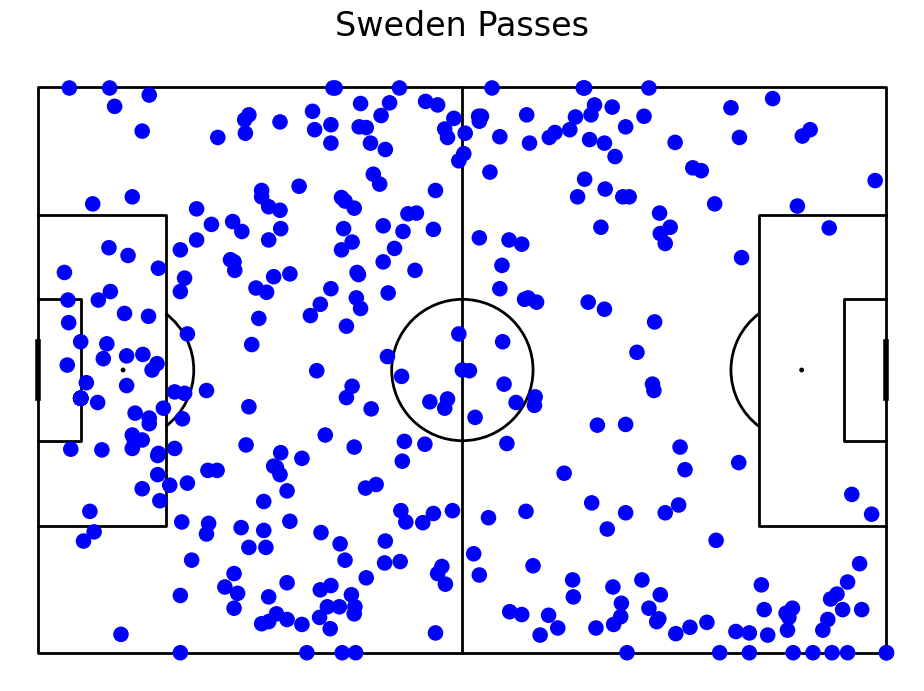

In [18]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10,7))
# Pitchsize in yards sorry not sorry
pitchLength = 120
pitchWidth = 80
team_name=shot['team_name']
for i, pass1 in passes.iterrows():
    x = pass1['x']
    y = pass1['y']
    team_name = pass1['team_name']
    circleSize = 1
    # Plot Sweden
    if (team_name == team2):
        passCircle = plt.Circle((x,y), circleSize, color = "blue")
        ax.add_patch(passCircle)
fig.suptitle("Sweden Passes", fontsize = 24)     
fig.set_size_inches(10, 7)
plt.show()

# Plotting every pass from Caroline Seger
Named Sara Caroline Seger in database

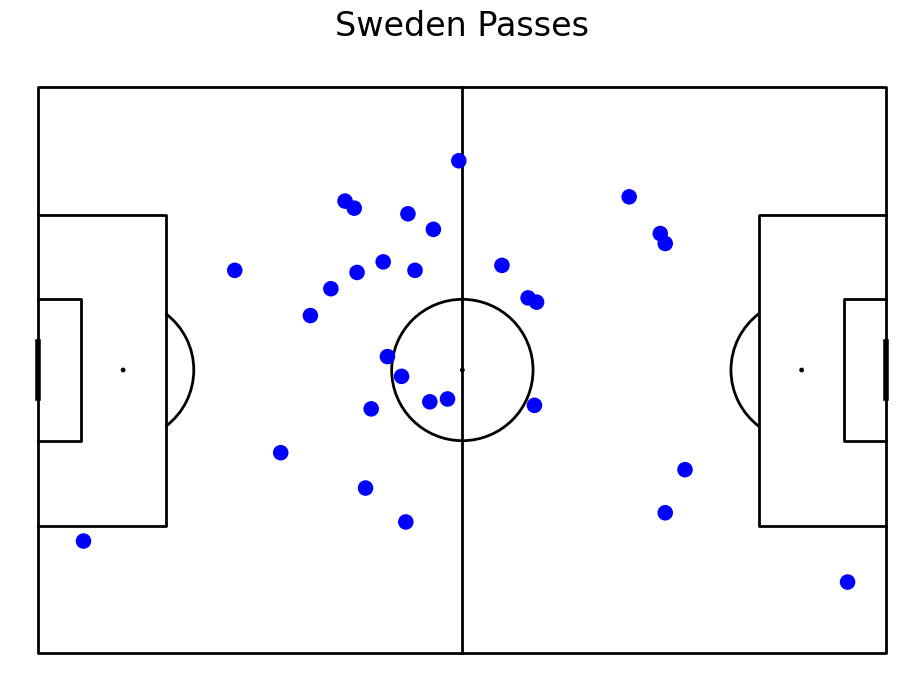

In [25]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10,7))
# Pitchsize in yards sorry not sorry
pitchLength = 120
pitchWidth = 80

for i, pass1 in passes.iterrows():
    x = pass1['x']
    y = pass1['y']
    playerName = pass1['player_name']
    circleSize = 1
    # Plot Seger's Passes
    if (playerName == "Sara Caroline Seger"):
        passCircle = plt.Circle((x,y), circleSize, color = "blue")
        ax.add_patch(passCircle)
fig.suptitle("Caroline Seger Passes", fontsize = 24)     
fig.set_size_inches(10, 7)
plt.show()

In [33]:

column_headers = passes.columns.tolist()

# Print the column names
for column_header in column_headers:
    print(column_header)

index
period
timestamp
minute
second
possession
duration
match_id
type_id
type_name
possession_team_id
possession_team_name
play_pattern_id
play_pattern_name
team_id
team_name
tactics_formation
player_id
player_name
position_id
position_name
pass_recipient_id
pass_recipient_name
pass_length
pass_angle
pass_height_id
pass_height_name
end_x
end_y
body_part_id
body_part_name
sub_type_id
sub_type_name
x
y
under_pressure
outcome_id
outcome_name
out
counterpress
pass_deflected
pass_switch
technique_id
technique_name
pass_cross
off_camera
shot_statsbomb_xg
end_z
shot_first_time
goalkeeper_position_id
goalkeeper_position_name
ball_recovery_recovery_failure
pass_assisted_shot_id
pass_shot_assist
shot_key_pass_id
foul_won_defensive
aerial_won
pass_goal_assist
substitution_replacement_id
substitution_replacement_name
foul_committed_offensive
shot_one_on_one
dribble_overrun
block_deflection
bad_behaviour_card_id
bad_behaviour_card_name
pass_no_touch
block_save_block
foul_committed_advantage
foul_w

# Plotting every pass from Segers with direction
Using mathematics with pass_angle and pass_length

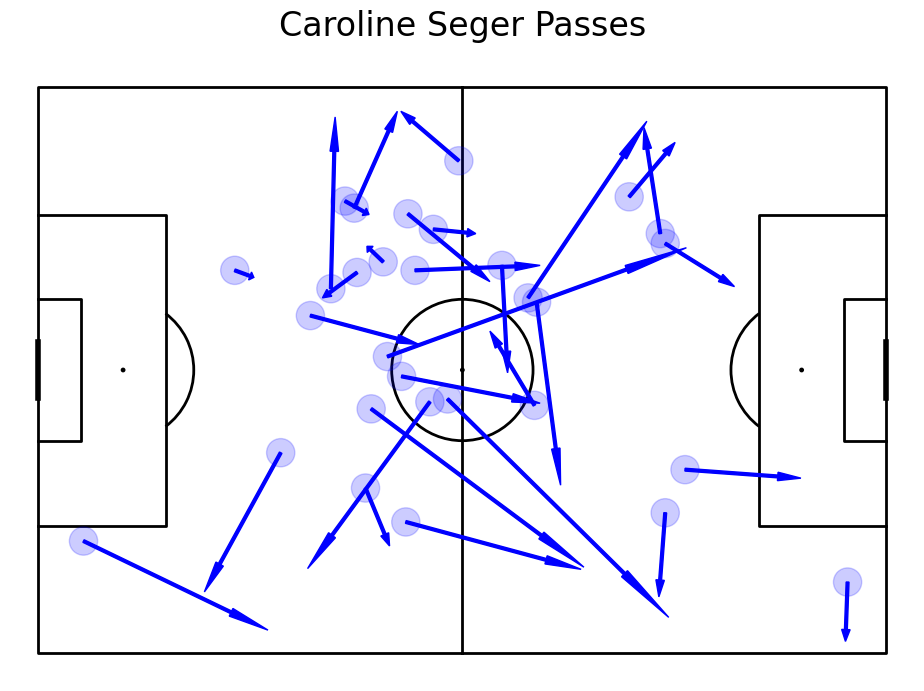

In [47]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10,7))
# Pitchsize in yards sorry not sorry
pitchLength = 120
pitchWidth = 80

for i, pass1 in passes.iterrows():
    # Plot Seger's Passes
    playerName = pass1['player_name']
    if (playerName == "Sara Caroline Seger"):
        x = pass1['x']
        y = pass1['y']
        passAngle = pass1['pass_angle']
        passLength = pass1['pass_length']
        receiveX = np.cos(passAngle)*passLength
        receiveY = np.sin(passAngle)*passLength
        circleSize = 2
        passCircle = plt.Circle((x,y), circleSize, color = "blue")
        passCircle.set_alpha(0.2)
        passArrow = plt.Arrow(x,y,receiveX,receiveY,width=2, color = "blue")
        ax.add_patch(passCircle)
        ax.add_patch(passArrow)
fig.suptitle("Caroline Seger Passes", fontsize = 24)     
fig.set_size_inches(10, 7)
plt.show()

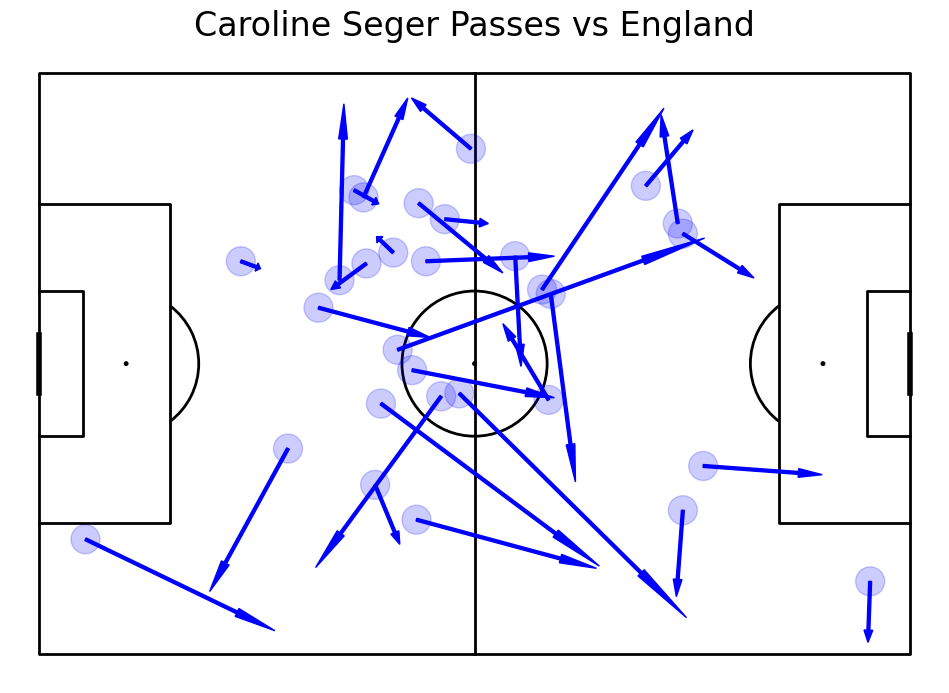

In [41]:
#drawing pitch
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))

for i,thepass in passes.iterrows():
    #if pass made by Lucy Bronze
    if thepass['player_name']=='Sara Caroline Seger':
        x=thepass['x']
        y=thepass['y']
        #plot circle
        passCircle=plt.Circle((x,y),2,color="blue")
        passCircle.set_alpha(.2)
        ax.add_patch(passCircle)
        dx=thepass['end_x']-x
        dy=thepass['end_y']-y
        #plot arrow
        passArrow=plt.Arrow(x,y,dx,dy,width=2,color="blue")
        ax.add_patch(passArrow)

ax.set_title("Caroline Seger Passes vs England", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

# Making the pass map using mplsoccer functions

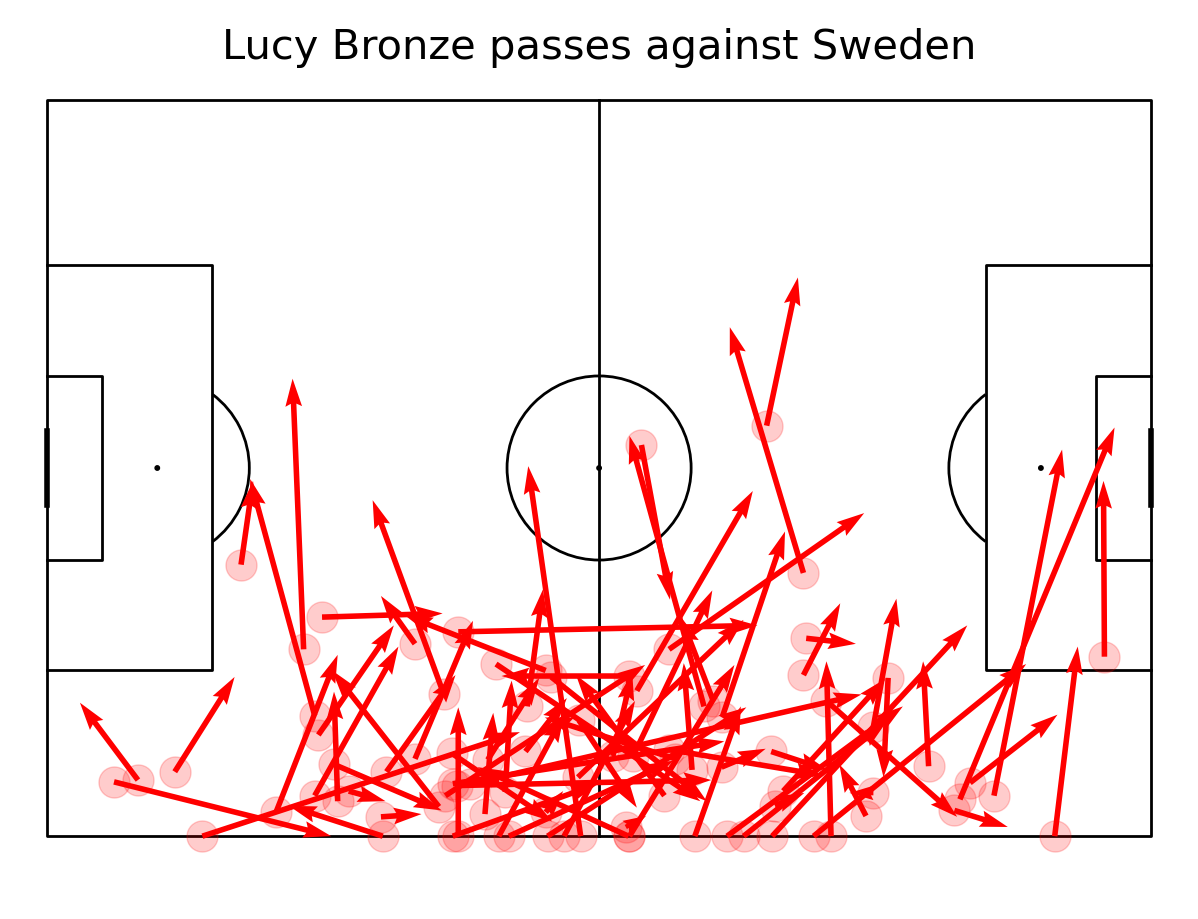

In [49]:
mask_bronze = (df.type_name == 'Pass') & (df.player_name == "Lucy Bronze")
df_pass = df.loc[mask_bronze, ['x', 'y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.x, df_pass.y,
            df_pass.end_x, df_pass.end_y, color = "red", ax=ax['pitch'])
pitch.scatter(df_pass.x, df_pass.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])
fig.suptitle("Lucy Bronze passes against Sweden", fontsize = 30)
plt.show()

# Plotting multiple pass maps on one figure

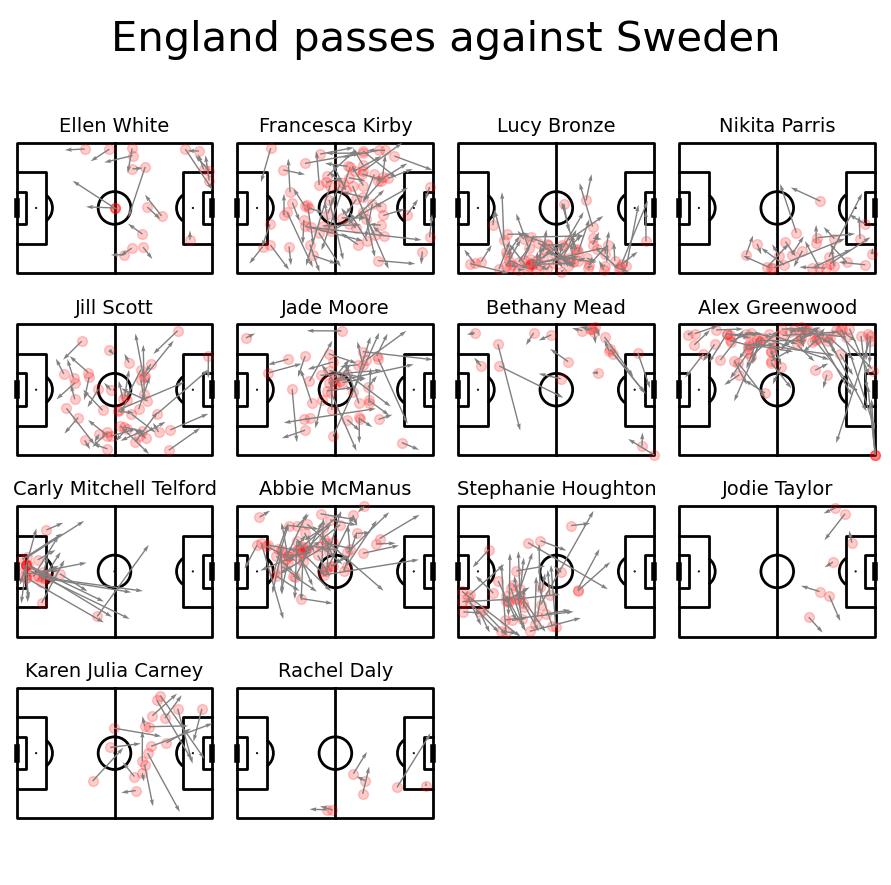

In [66]:
mask_england = (df.type_name == 'Pass') & (df.team_name == "England Women's") & (df.sub_type_name != "Throw-in")
df_passes = df.loc[mask_england, ['x', 'y', 'end_x', 'end_y', 'player_name']]
names = df_passes.player_name.unique()
#print(names)

#Create 4x4 pitches
pitch = Pitch(line_color='black', pad_top=20)
fig, axs = pitch.grid(nrows=4, ncols=4, figheight=10, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,
            ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["player_name"] == name]
    #scatter
    pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "red", ax=ax)
    #plot arrow
    pitch.arrows(player_df.x, player_df.y,
            player_df.end_x, player_df.end_y, color = "grey", ax=ax, width=1)

#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()

#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, 'England passes against Sweden', ha='center', va='center', fontsize=30)
plt.show()
